# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044
* Nicolas Tonizzo - 107280

#### Imports y configs

Importamos las librerias y creamos el dataframe

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [ ]:
hotel.sample(5)

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [ ]:
hotel.info()

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [ ]:
cualitativas = hotel[['hotel', 'arrival_date_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled']]
cualitativas

La variable 'hotel' puede tomar los siguientes valores:

In [ ]:
hotel['hotel'].value_counts()

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_month'].value_counts()

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_week_number'].value_counts().sort_index()


La variable 'meal' puede tomar los siguientes valores:

In [ ]:
hotel['meal'].value_counts().sort_index()

La variable 'country' puede tomar los siguientes valores:

In [ ]:
hotel['country'].value_counts()

La variable 'market_segment' puede tomar los siguientes valores:

In [ ]:
hotel['market_segment'].value_counts()


La variable 'distribution_channel' puede tomar los siguientes valores:

In [ ]:
hotel['distribution_channel'].value_counts()


La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [ ]:
hotel['is_repeated_guest'].value_counts()

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [ ]:
hotel['reserved_room_type'].value_counts().sort_index()

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [ ]:
hotel['assigned_room_type'].value_counts().sort_index()


La variable 'deposit_type' puede tomar los siguientes valores:

In [ ]:
hotel['deposit_type'].value_counts()

La variable 'agent' puede tomar los siguientes valores:

In [ ]:
hotel['agent'].value_counts()

La variable 'company' puede tomar los siguientes valores:

In [ ]:
hotel['company'].value_counts()


La variable 'customer_type' puede tomar los siguientes valores:

In [ ]:
hotel['customer_type'].value_counts()

La variable 'is_canceled' puede tomar los siguientes valores:

In [ ]:
hotel['is_canceled'].value_counts()


#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [ ]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

#### Variables irrelevantes para el análisis

Para el análisis de los datos podemos considerar que la variable 'id' será irrelevante ya que no aporta información sobre las reservas de los hoteles, es solamente un identificador de cada una.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

In [ ]:
hotel.drop(columns=['id'], inplace=True)

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

In [ ]:
sns.countplot(x='hotel', data=cualitativas)

In [ ]:
sns.countplot(x='customer_type', data=cualitativas)

In [ ]:
sns.countplot(x='deposit_type', data=cualitativas)

In [ ]:
sns.countplot(x='distribution_channel', data=cualitativas)

In [ ]:
sns.countplot(x='market_segment', data=cualitativas)

In [ ]:
# graficar country ordenados por apariciones, los 20 primeros
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

In [ ]:
# copiar las columnas 'assigned_room_type' y 'reserved_room_type' en un nuevo dataframne
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

# plot the histogram using seaborn, ordenar por apariciones
sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')



In [ ]:
# graficar 'is_repeat_guest'
sns.countplot(x='is_repeated_guest', data=cualitativas)


In [ ]:
# graficar meal
sns.countplot(x='meal', data=cualitativas)

In [ ]:
# graficar is_canceled
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

<Axes: xlabel='lead_time', ylabel='Count'>

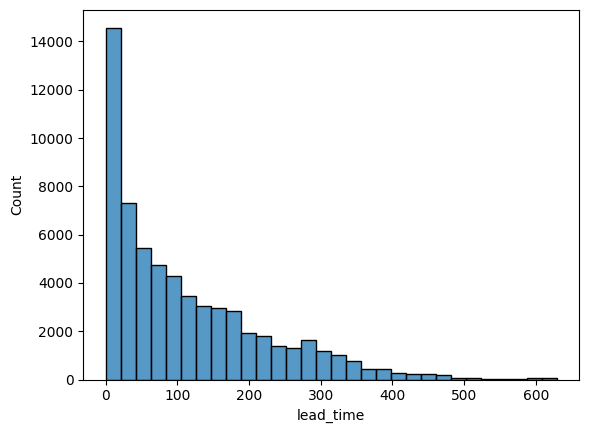

In [109]:
# graficar 'lead_time'
sns.histplot(hotel['lead_time'], bins=30)

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [ ]:
matrix_corr = hotel.corr()
matrix_corr

Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(matrix_corr, annot = True, annot_kws = {"size":12}, cmap='coolwarm')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

#### Relación de variables con el target

Ahora me quedo solo con las correlaciones entre las variables y nuestro target 'is_canceled'

Otra forma de ver las correlaciones entre variables es con scatterplots pero en este caso al ser tantas variables, no es de mucha utilidad.

In [ ]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

Las grafico también en un heatmap para verlas con mayor claridad

In [ ]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(matrix_corr[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

In [ ]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

### **Visualización de los datos**

### **Datos faltantes**

#### Análisis

In [ ]:

# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


#### Revisión y decisión

##### Nulls en ``'children'``

Por el ínfimo porcentaje de datos faltantes en la columna "children", podemos simplemente eliminar las filas que tienen este dato como null.

In [ ]:
# drop records where 'children' is null
hotel.dropna(subset=['children'], inplace=True)


In [ ]:
print("Cantidad de registros", hotel.shape[0])


Confirmamos que se eliminaron 4 registros del dataset.

##### Nulls en ``'country'``

##### Nulls en ``'company'``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o en persona; y no específicamente cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que lo volverá a hacer. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Revisaremos entonces la distribución de agentes y compañías respecto al target del modelo, la columna ``is_canceled``.

In [ ]:
# graficar 'company' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='company', data=hotel, hue='is_canceled',
              order=hotel['company'].value_counts().iloc[:30].index)


In [ ]:
# graficar 'agent' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='agent', data=hotel, hue='is_canceled',
              order=hotel['agent'].value_counts().iloc[:30].index)


In [ ]:
# create a new column 'is_used_agent' that is 1 if 'agent' is not null, 0 otherwise
_hotel = hotel.copy()
_hotel['is_used_agent'] = _hotel['agent'].notna().astype(int)
_hotel['is_used_agent'].value_counts()


In [ ]:
# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()


In [ ]:
# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()


No sé cómo intrepretar este dato... ¿Cómo usaron compañía y agente a la vez?

##### Nulls en ``'agent'``

#### Comparaciones

### **Valores atípicos**

#### Detección

##### Univariada

##### Multivariada

#### Características

#### Tratamiento

## BORRADOR ///

In [ ]:
#Datos nulos
hotel.isna().sum()

'company' y 'agent' tienen muchos datos faltantes, puede que sea una variable irrelevante para el análisis

In [ ]:
#Datos no nulos
hotel.notna().sum()

In [ ]:
# ¿Cuál es la proporción de reservas canceladas en relación con el total de reservas?
prop_cancelaciones = len(hotel[hotel['is_canceled'] == 1]) / len(hotel) *100
print(f"La proporción de reservas canceladas en relación al total de reservas es {prop_cancelaciones:.2f}%")

In [ ]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

In [ ]:
# graficar cancelado vs tiempo de espera
sns.scatterplot(x='days_in_waiting_list', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [ ]:
# ¿Cuál es la proporción de reservas canceladas por clientes Transient en relación con el total de reservas realizadas por clientes Transient?
prop_cancelaciones_transient = len(hotel[(hotel['is_canceled'] == 1) & (hotel['customer_type'] == 'Transient')]) / len(hotel[(hotel['customer_type'] == 'Transient')]) *100
print(f"La proporción de reservas canceladas por clientes Transient es {prop_cancelaciones_transient:.2f}%")

In [ ]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [ ]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [ ]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


In [ ]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [ ]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

In [ ]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

In [ ]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [ ]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


In [ ]:
# Correlacion de pearson de las variables con 'is_canceled'
correlacion = hotel.corr(method='pearson')
correlacion['is_canceled'].sort_values(ascending=False).reset_index()


C:\Users\Luca\AppData\Local\Temp\ipykernel_22096\1911941991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = hotel.corr(method='pearson')


,index,is_canceled
0,is_canceled,1.000000
1,lead_time,0.293816
2,previous_cancellations,0.099613
3,adults,0.060179
4,days_in_waiting_list,0.050827
5,adr,0.049206
6,stays_in_week_nights,0.028439
7,arrival_date_year,0.019923
8,arrival_date_week_number,0.008357
9,children,0.006242


array([[<Axes: xlabel='is_canceled', ylabel='is_canceled'>,
        <Axes: xlabel='lead_time', ylabel='is_canceled'>,
        <Axes: xlabel='previous_cancellations', ylabel='is_canceled'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='is_canceled'>],
       [<Axes: xlabel='is_canceled', ylabel='lead_time'>,
        <Axes: xlabel='lead_time', ylabel='lead_time'>,
        <Axes: xlabel='previous_cancellations', ylabel='lead_time'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='lead_time'>],
       [<Axes: xlabel='is_canceled', ylabel='previous_cancellations'>,
        <Axes: xlabel='lead_time', ylabel='previous_cancellations'>,
        <Axes: xlabel='previous_cancellations', ylabel='previous_cancellations'>,
        <Axes: xlabel='days_in_waiting_list', ylabel='previous_cancellations'>],
       [<Axes: xlabel='is_canceled', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='lead_time', ylabel='days_in_waiting_list'>,
        <Axes: xlabel='previous_cancellations', yla

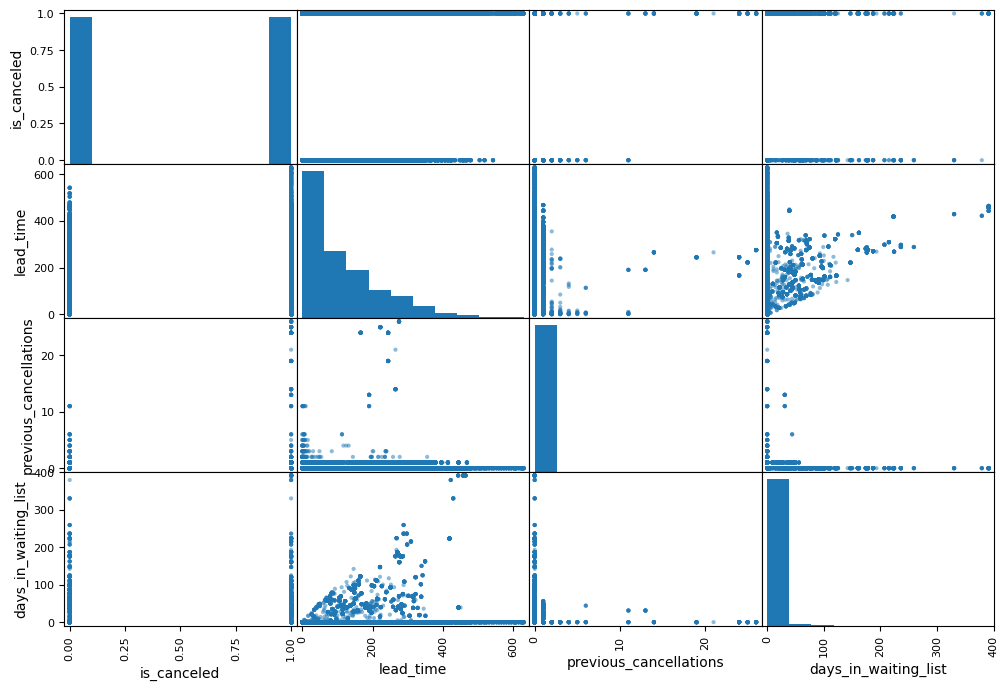

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["is_canceled", "lead_time", "previous_cancellations", "days_in_waiting_list"]
scatter_matrix(hotel[attributes], figsize=(12, 8))

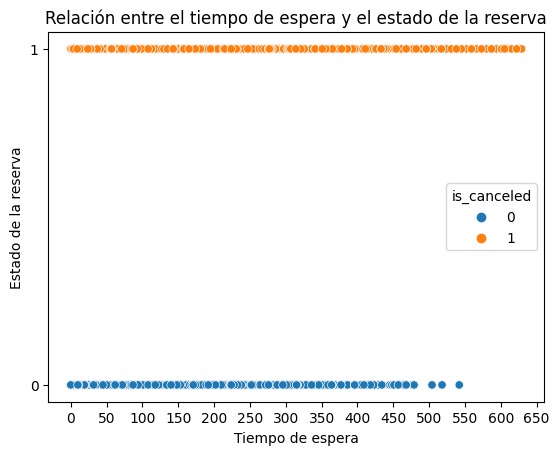

In [ ]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

In [ ]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

In [ ]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [ ]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

In [ ]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

In [ ]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [ ]:
# heatmap de correlacion de pearson


In [ ]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = hotel_reducido.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = hotel_reducido.pivot_table(
    index='customer_type', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()


In [ ]:
hotel_reducido.info()

In [ ]:
# dropeamos company xq son la mayoria nulos
hotel_reducido.drop('company', axis=1, inplace=True)
hotel_reducido.info()

In [ ]:
# graficar relacion entre 20 agents mas comunes y 'is_canceled'
top_20_agents = hotel_reducido['agent'].value_counts().head(20).index
sns.countplot(x='agent', hue='is_canceled', data=hotel_reducido[hotel_reducido['agent'].isin(top_20_agents)])


In [ ]:
# graficar relacion entre 'babies' y 'is_canceled'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido)

In [ ]:
# graficar relacion entre 'babies' y 'is_canceled', sacanado los registros con 0 'babies'
sns.countplot(x='babies', hue='is_canceled', data=hotel_reducido[hotel_reducido['babies'] != 0])


In [ ]:
# graficar relacion entre 'childre' y 'is_canceled'
sns.countplot(x='children', hue='is_canceled', data=hotel_reducido)

In [ ]:
# graficar cantidad de bebes por reserva, sacando los registros con 0 'babies'
sns.countplot(x='babies', data=hotel_reducido[hotel_reducido['babies'] > 1])

In [ ]:
# graficar cantidad de 'children' por reserva
sns.countplot(x='children', data=hotel_reducido[hotel_reducido['children'] > 3])

In [ ]:
# buscar registros con 'children' > 3
hotel_reducido[hotel_reducido['children'] > 3]


In [ ]:
# buscar registros con 'babies' > 2
hotel_reducido[hotel_reducido['babies'] > 2]